# Introduction

In this project, you will build a neural network of your own design to evaluate the Fashion MNIST dataset.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

## Load the Dataset

Specify your transforms as a list if you intend to.
The transforms module is already loaded as `transforms`.

FashionMNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor()])

# Download the training dataset
trainset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=True, transform=transform)
# split the training dataset into training and validation datasets
trainset,validset=torch.utils.data.random_split(trainset,[50000,10000])
# Download test set
testset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=False, transform=transform)

#Create Pytorch Data Loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



100%|██████████| 26421880/26421880 [00:01<00:00, 16900363.68it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 263732.29it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4980046.43it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5248487.36it/s]


Extracting /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Deeplearning with pytorch udacity/FMNIST_Data/FashionMNIST/raw



In [3]:
#size of training dataset
print(len(trainloader.dataset))
print(len(trainloader))
#Do you know what is the difference?

50000
782


Check shapes of Inputs and Outputs

In [5]:
dataiter = iter(trainloader) #queue containing the batches
images, labels = next(dataiter) #fetches the next batch in the queue
print(type(images))
print(images.shape)
print(labels.shape)
print(labels)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([2, 3, 6, 3, 6, 2, 8, 0, 8, 3, 4, 4, 8, 0, 6, 7, 1, 4, 8, 0, 3, 0, 7, 2,
        0, 4, 7, 8, 0, 4, 6, 2, 8, 1, 5, 4, 9, 9, 0, 0, 9, 3, 3, 8, 4, 6, 3, 9,
        2, 5, 5, 8, 4, 6, 6, 6, 9, 8, 8, 8, 0, 0, 0, 9])


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


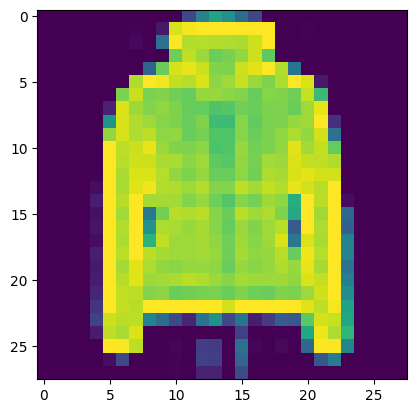

8


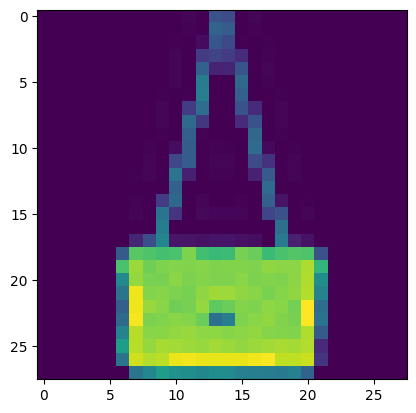

0


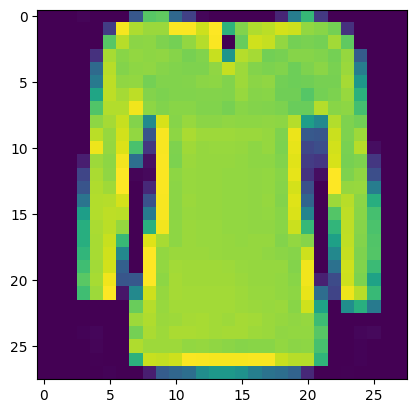

8


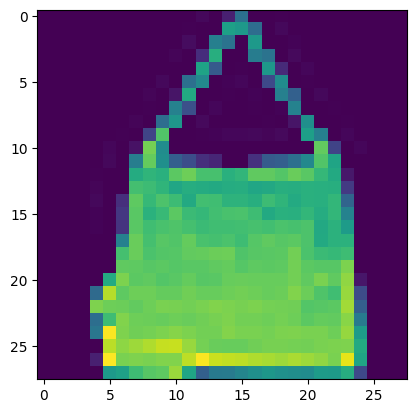

8


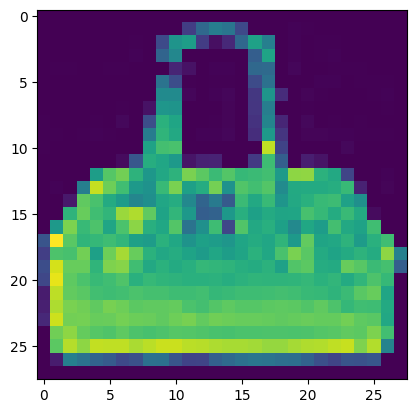

In [8]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

### Random Erasing transform

7


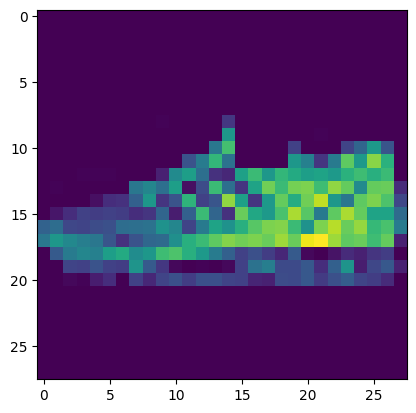

4


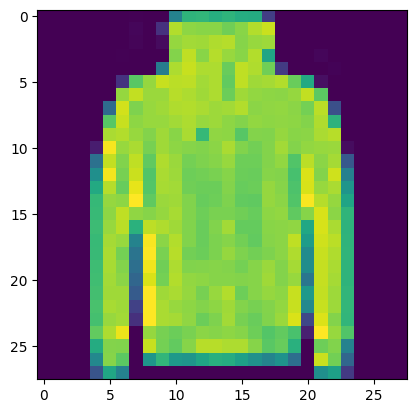

3


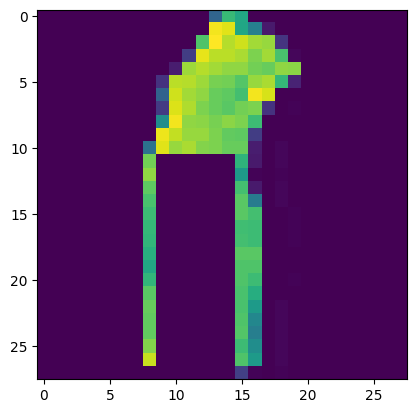

0


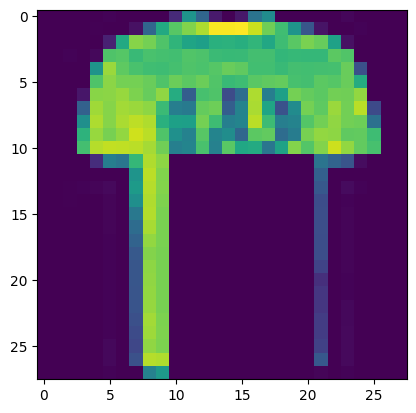

0


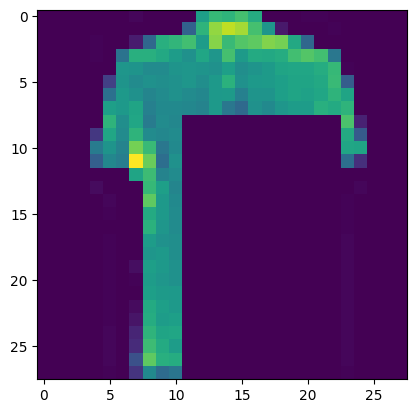

In [10]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.RandomErasing()])

# Download the training dataset
trainset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=True, transform=transform)
# split the training dataset into training and validation datasets
trainset,validset=torch.utils.data.random_split(trainset,[50000,10000])
# Download test set
testset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=False, transform=transform)

#Create Pytorch Data Loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Explore data
## YOUR CODE HERE ##
show5(trainloader)

### Resize transform

7


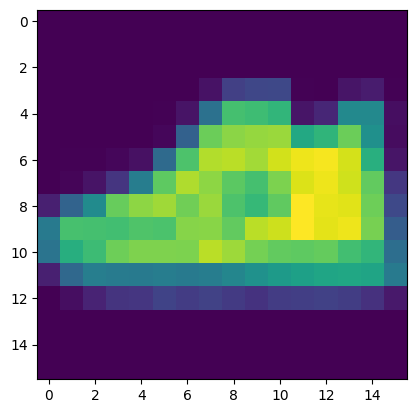

9


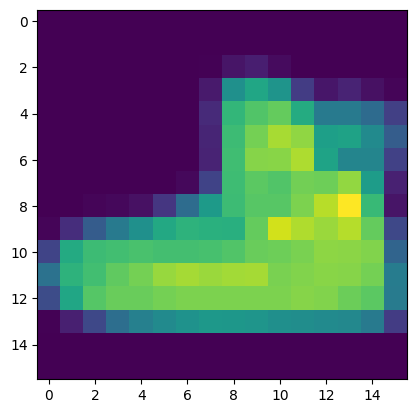

2


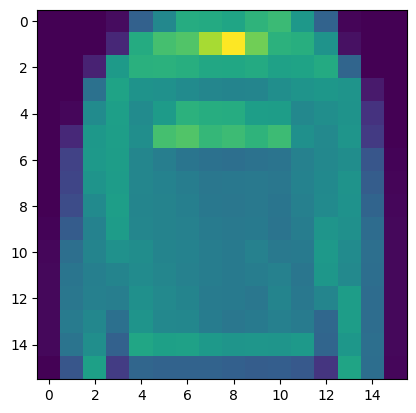

9


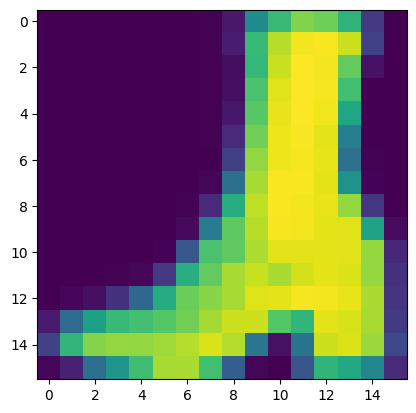

5


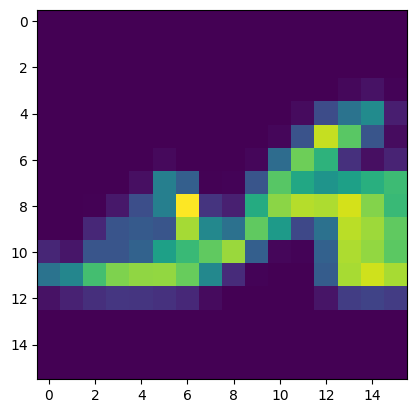

In [13]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize(size=(16,16))])

# Download the training dataset
trainset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=True, transform=transform)
# split the training dataset into training and validation datasets
trainset,validset=torch.utils.data.random_split(trainset,[50000,10000])
# Download test set
testset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=False, transform=transform)

#Create Pytorch Data Loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Explore data
## YOUR CODE HERE ##
show5(trainloader)

### The [Normalize transform](https://pytorch.org/vision/stable/generated/torchvision.transforms.functional.normalize.html#torchvision.transforms.functional.normalize)
Let's find the mean and standard deviation of the 1 channel images of the training dataset of the fashion Mnist dataset.



In [21]:
def Normalize(dataloader):
    #finding mean and std for input images

    summ_means, squared_sum_mean, num_batches= 0, 0, 0
    num_batches = len(dataloader)

    for data,label in dataloader:
        # Mean over batch, height and width, but not over the channels
        summ_means += torch.mean(data) #sum of means for all batches
        squared_sum_mean += torch.mean(data**2) #sum of mean of squares for all batches

    mean_gray = summ_means / len(dataloader) #num_batches = len(dataloader)

    # std = sqrt(E[X^2] - (E[X])^2)
    std_gray = (squared_sum_mean / num_batches - mean_gray ** 2) ** 0.5
    print("Mean is ",mean_gray.item()," STD is ",std_gray.item())
    return mean_gray,std_gray


Normalize(trainloader)

Mean is  0.2866719663143158  STD is  0.32170093059539795


(tensor(0.2867), tensor(0.3217))

3


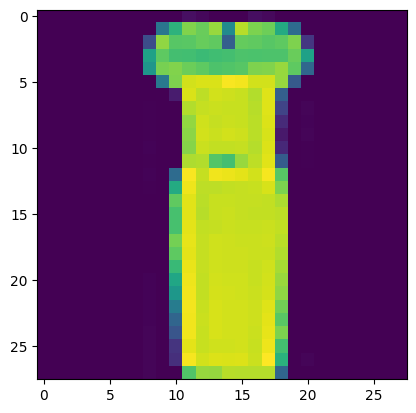

9


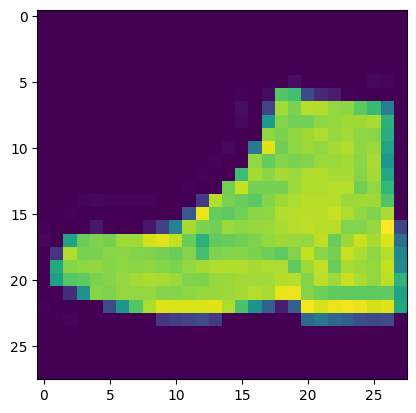

9


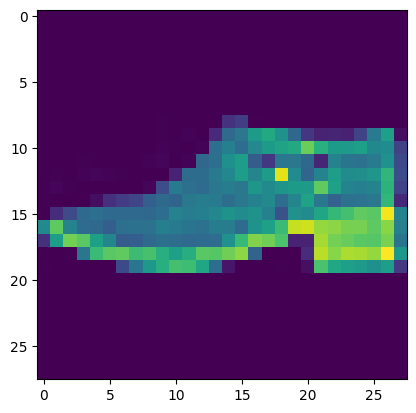

0


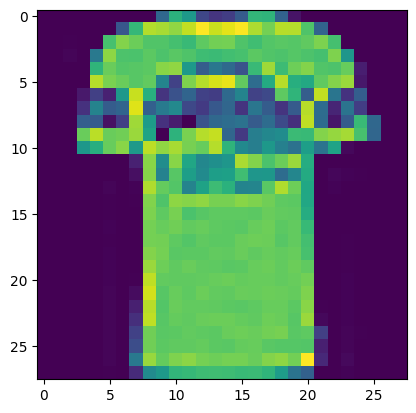

6


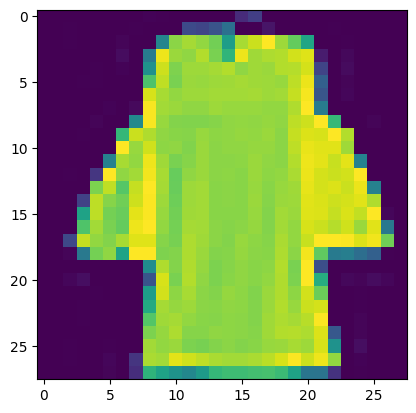

In [22]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.2867,), (0.3217,)),
                               ])
# Download the training dataset
trainset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=True, transform=transform)
# split the training dataset into training and validation datasets
trainset,validset=torch.utils.data.random_split(trainset,[50000,10000])
# Download test set
testset = datasets.FashionMNIST('~/Deeplearning with pytorch udacity/FMNIST_Data', download=True, train=False, transform=transform)

#Create Pytorch Data Loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Explore data
## YOUR CODE HERE ##
show5(trainloader)

Check that now the mean of the dataset is 0 and the std is 1

In [25]:
Normalize(trainloader)

Mean is  -0.0030313453171402216  STD is  1.0967698097229004


(tensor(-0.0030), tensor(1.0968))

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [26]:
## YOUR CODE HERE ##
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Define dropout layers with a dropout probability (e.g., 0.2)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after the second layer
        x = F.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout after the rhird layer
        x=self.fc4(x) #output shape ((64,10)) #No dropout added
        #print(x.shape)
        x = F.log_softmax(x, dim=1) #logsoftmax for each row
        #print(x.shape) #output shape ((64,10))
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
## Create Model Instance, Evaluation Criteria, and define the optimizer
model = Classifier().to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
# Print the initialized weights
print("fc1 weight:", model.fc1.weight)
## To Do : Print the mean and standard deviation of FC1 weights
print("fc1 weight Mean: {}, STD: {}" .format(torch.mean(model.fc1.weight),torch.std(model.fc1.weight)))
## To Do : Print the maximum and minimum values of FC1 weights
print("fc1 weight Max: {}, Min: {}" .format(torch.max(model.fc1.weight),torch.min(model.fc1.weight)))
## To Do : Print the Size of FC1 weights
print("fc1 weight Size", model.fc1.weight.shape)
#[256, 784].[784,1] =  [256,1]
print("fc1 bias:", model.fc1.bias)
## To Do : Print the maximum and minimum values of FC1 biases
print(f" fc1 bias max and min is: {torch.max(model.fc1.bias)} and {torch.max(model.fc1.bias)}.")
## To Do : Print the mean and standard deviation of FC1 biases
print(f" fci mean max and std is: {torch.mean(model.fc1.bias)} and {torch.std(model.fc1.bias)}.")
## To Do : Print the Size of FC1 biases
print("fc1 Bias Size", model.fc1.bias.shape)
##################################################
print("fc2 weight:", model.fc2.weight)
print("fc2 bias:", model.fc2.bias)
print("fc3 weight:", model.fc3.weight)
print("fc3 bias:", model.fc3.bias)
print("fc4 weight:", model.fc4.weight)
print("fc4 bias:", model.fc4.bias)

### Other Initialization Methods

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        # TO DO: Initialize the weights & biases of fc1 using Xavier initialization
        init.xavier_uniform_(self.fc1.weight)
        init.constant_(self.fc1.bias, 0.0)

        # Initialize the weights of fc2 using He initialization
        init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        init.constant_(self.fc2.bias, 0.0)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
model = MyModel()

# Print the initialized weights
print("fc1 weight:", model.fc1.weight)
print("fc1 bias:", model.fc1.bias)
print("fc2 weight:", model.fc2.weight)
print("fc3 weight:", model.fc3.weight)




fc1 weight: Parameter containing:
tensor([[-0.0084,  0.0366,  0.0048,  ...,  0.0009,  0.0072, -0.0432],
        [-0.0584,  0.0650, -0.0132,  ...,  0.0749,  0.0669, -0.0480],
        [ 0.0747, -0.0399, -0.0644,  ...,  0.0177, -0.0174, -0.0733],
        ...,
        [ 0.0324,  0.0281,  0.0290,  ..., -0.0111, -0.0397,  0.0291],
        [-0.0055,  0.0012,  0.0341,  ...,  0.0536,  0.0244, -0.0699],
        [ 0.0161, -0.0145,  0.0062,  ..., -0.0541, -0.0147, -0.0253]],
       requires_grad=True)
fc1 bias: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0